In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..", "")))

import torch
from torch.utils.data import ConcatDataset

import itertools

from src.data_generator.heat_equations import HeatEquationDataset
from src.data_generator.diffusion_equations import DiffusionEquationDataset
from src.data_generator.wave_equations import WaveEquationDataset

from src.train.multi_physics_train import train
from src.figures.figures import plot_sample
from src.models.multi_physics import Encoder, MultiMeasurementHeads, MultiPropertyHeads, SharedDecoder
from src.loss_function.loss_function import Loss



# Create Dataset
wave_dataset = WaveEquationDataset(n_samples=2, nx=50, nt=50)
diffusion_dataset = DiffusionEquationDataset(n_samples=2, nx=50, nt=50)
heat_dataset = HeatEquationDataset(n_samples=2, nx=50, nt=50)
dataset = ConcatDataset([wave_dataset, diffusion_dataset, heat_dataset])

# Define PINNS
embedding_dim = 2
encoder = Encoder(latent_dim=embedding_dim)
decoder = {
    "measurements": MultiMeasurementHeads(spacetime_dim=2),
    "properties": MultiPropertyHeads(latent_dim=embedding_dim)
}

# training
encoder.train()
for decoder_net in decoder.values():
    decoder_net.train()

lr = 1e-3
all_params = list(encoder.parameters()) + list(itertools.chain.from_iterable(
decoder_net.parameters() for decoder_net in decoder.values()
))
optimizer = torch.optim.Adam(all_params, lr=lr)

loss = Loss()
train(
    loss_function=loss,
    optimizer=optimizer,
    dataset=dataset,
    encoder=encoder,
    decoder=decoder,
    epochs=2000
)

# plot
encoder.eval()
for decoder_net in decoder.values():
    decoder_net.eval()



Epoch 0: Loss = 1.1703e+03
Epoch 20: Loss = 5.3672e+02
Epoch 40: Loss = 5.1201e+02
Epoch 60: Loss = 4.9778e+02
Epoch 80: Loss = 4.8491e+02
Epoch 100: Loss = 4.7189e+02
Epoch 120: Loss = 4.6140e+02
Epoch 140: Loss = 4.5649e+02
Epoch 160: Loss = 4.5412e+02
Epoch 180: Loss = 4.5132e+02
Epoch 200: Loss = 4.3714e+02
Epoch 220: Loss = 4.1098e+02
Epoch 240: Loss = 4.0312e+02
Epoch 260: Loss = 4.0120e+02
Epoch 280: Loss = 4.0060e+02
Epoch 300: Loss = 4.0248e+02
Epoch 320: Loss = 4.0016e+02
Epoch 340: Loss = 3.9996e+02
Epoch 360: Loss = 3.9980e+02
Epoch 380: Loss = 3.9965e+02
Epoch 400: Loss = 4.0009e+02
Epoch 420: Loss = 3.9953e+02
Epoch 440: Loss = 3.9942e+02
Epoch 460: Loss = 3.9936e+02
Epoch 480: Loss = 3.9931e+02
Epoch 500: Loss = 3.9927e+02
Epoch 520: Loss = 4.0359e+02
Epoch 540: Loss = 3.9924e+02
Epoch 560: Loss = 3.9919e+02
Epoch 580: Loss = 3.9916e+02
Epoch 600: Loss = 3.9913e+02
Epoch 620: Loss = 3.9915e+02
Epoch 640: Loss = 3.9921e+02
Epoch 660: Loss = 3.9909e+02
Epoch 680: Loss = 3.

6


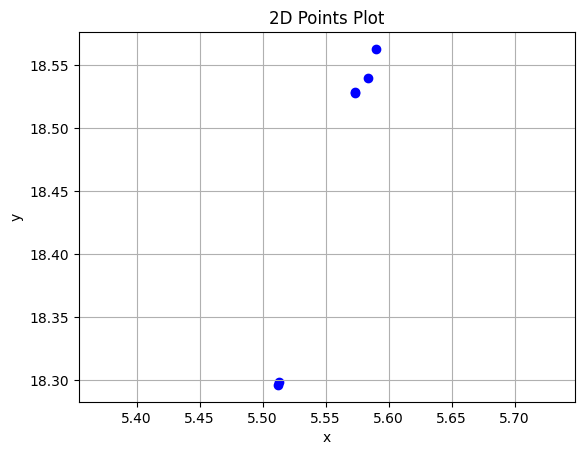

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
print(len(dataset))
embeddings = [encoder(item["encoder_input"])[0].detach().numpy() for item in dataset]
# Separate x and y coordinates
x_vals = [x[0] for x in embeddings]
y_vals = [x[1] for x in embeddings]

plt.scatter(x_vals, y_vals, color='blue', marker='o')  # for dots

# Label axes
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Points Plot')

plt.grid(True)
plt.axis('equal')  # to keep aspect ratio of 1:1
plt.show()